In [32]:
import pandas as pd
import numpy as np

In [33]:
X = pd.read_csv("../data/forecasts_for_ml/X.csv").values
y = pd.read_csv("../data/forecasts_for_ml/y.csv")

In [34]:
print(f"note: we have {len(y)} records\n {round(1/6)} we have a class imbalance issue maybe fix ")
y.value_counts() / len(y)

note: we have 252167 records
 0 we have a class imbalance issue maybe fix 


model_w_least_error
prophet                0.226219
neural_prophet         0.214560
ardl                   0.179004
exp_smooth             0.149167
autoreg                0.123664
xgb_preds              0.107385
dtype: float64

In [5]:
y = y.values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)


In [10]:
yhat

array(['autoreg', 'exp_smooth', 'autoreg', ..., 'prophet', 'prophet',
       'prophet'], dtype=object)

In [15]:
y_test = [x for sub in y_test for x in sub]

In [ ]:
yhat == y_test

In [18]:
sum(yhat == y_test) / len(yhat)
# lol

0.21690262127727075

In [19]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)


array([[ 6183,  3913,  4509,  6182,  7287,  3456],
       [ 3955,  3694,  3143,  3580,  4739,  2778],
       [ 4611,  3200,  4699,  5586,  5720,  2597],
       [ 6435,  3702,  5719, 10772,  8022,  3234],
       [ 7214,  4725,  5807,  7764,  9972,  4405],
       [ 3436,  2814,  2498,  2989,  4210,  2967]])

In [20]:
from xgboost import XGBClassifier


In [21]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/josephdespres/my_env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josephdespres/my_env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(objective='multi:softprob')

In [22]:
yhat = model.predict(X_test)

In [23]:
model.classes_

array(['ardl', 'autoreg', 'exp_smooth', 'neural_prophet', 'prophet',
       'xgb_preds'], dtype=object)

In [30]:
p = model.predict_proba(X_test)

pd.DataFrame(p, columns=model.classes_)

,ardl,autoreg,exp_smooth,neural_prophet,prophet,xgb_preds
0,0.210292,0.217515,0.097001,0.108298,0.293437,0.073458
1,0.119439,0.191382,0.183031,0.109239,0.220944,0.175965
2,0.150331,0.183912,0.176845,0.167731,0.180731,0.140449
3,0.165207,0.208737,0.109858,0.088256,0.245970,0.181972
4,0.142135,0.046821,0.152089,0.210252,0.311761,0.136942
...,...,...,...,...,...,...
176512,0.185009,0.118273,0.167644,0.205751,0.259494,0.063830
176513,0.288666,0.063981,0.125739,0.349620,0.122503,0.049490
176514,0.176985,0.207902,0.171445,0.155827,0.206726,0.081115
176515,0.180563,0.174413,0.152740,0.236027,0.205209,0.051049


In [29]:
sum(yhat == y_test) / len(yhat)

0.289405553006226

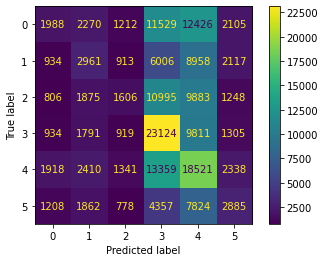

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot()

In [26]:
cm

array([[ 1988,  2270,  1212, 11529, 12426,  2105],
       [  934,  2961,   913,  6006,  8958,  2117],
       [  806,  1875,  1606, 10995,  9883,  1248],
       [  934,  1791,   919, 23124,  9811,  1305],
       [ 1918,  2410,  1341, 13359, 18521,  2338],
       [ 1208,  1862,   778,  4357,  7824,  2885]])

In [20]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [21]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', 
                   return_train_score=True, verbose=10, cv=3)

In [22]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [23]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV 1/3; 1/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 1/3; 1/405] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=(train=0.295, test=0.272) total time=  24.5s
[CV 2/3; 1/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 2/3; 1/405] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=(train=0.299, test=0.271) total time=  23.8s
[CV 3/3; 1/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6
[CV 3/3; 1/405] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6;, score=(train=0.294, test=0.275) total time=  23.7s
[CV 1/3; 2/405] START colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8
[CV 1/3; 2/405] END colsample_bytree=0.6, gamma=0.5, max_depth=3, min

GridSearchCV(cv=3, estimator=XGBClassifier(objective='multi:softprob'),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             return_train_score=True, scoring='accuracy', verbose=10)